1.	Problem #4 - Decision Trees
Classification trees, either binary or multi-class, are implemented in scikit-learn in the DecisionTreeClassifier class.   Build, plot and evaluate a decision tree on the wine dataset.  Split the dat set into 75% for training and 25% for testing.  Evaluate based on confusion matrix how well the model performed on training vs. testing.  Document the steps taken.  

In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
pwd

u'/Users/ryanriopelle/Documents/DSE/DSE220/Assignments/Lab 1/Lab1_mysolutions'

In [3]:
#Load the data

data_location="/Users/ryanriopelle/Documents/DSE/DSE220/Assignments/Lab 1/WineDataSet"
names=['Alcohol','Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', ' OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv(data_location, names= ['Alcohol','Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', ' OD280/OD315 of diluted wines', 'Proline'])
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
Y= df.index.values
X= df.values

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

In [6]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.fit(X_train, Y_train).predict(X_test)
score=clf.score(X_test, Y_test)
print score
print "The accuracy of the classifier is = %s percent"%score

0.888888888889
The accuracy of the classifier is = 0.888888888889 percent


Confusion matrix, without normalization
[[15  0  0]
 [ 1 13  1]
 [ 0  3 12]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.07  0.87  0.07]
 [ 0.    0.2   0.8 ]]


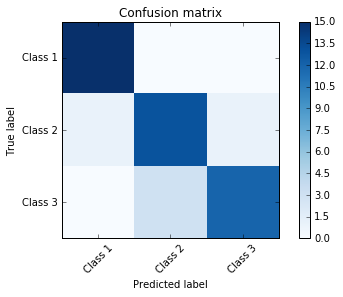

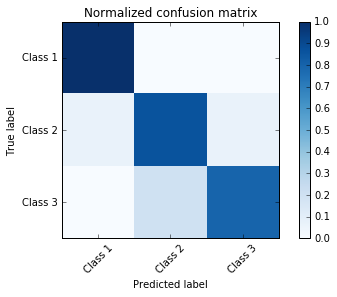

In [7]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ['Class 1','Class 2' , 'Class 3'], rotation=45)
    plt.yticks(tick_marks, ['Class 1','Class 2' , 'Class 3'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

# We get 91% accuracy, and the confusion matrix shows minimal errors
# occasionally we see class 2 and 3 getting classified incorrectly shown in the matrix shown above

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree.export_graphviz(clf, out_file='tree.dot')
!dot -Tjpeg -o decisionTree.png -v tree.dot

dyld: Library not loaded: /usr/lib/libltdl.7.dylib
  Referenced from: /Users/ryanriopelle/anaconda/bin/dot
  Reason: image not found


In [13]:
ls

Problem1.ipynb    dtree2.pdf        problem2.ipynb    problem3_2.ipynb
Problem_4.ipynb   dtree2.png        problem3.ipynb    tree.dot


In [23]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import io
import pydot

dot_data = io.StringIO()

with open ('workfile.dot','w') as f:
    tree.export_graphviz(clf, out_file=f,  feature_names=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity','Hue', 'OD280/OD315 of diluted wines', 'Proline'],  class_names=['Class 1','Class 2', 'Class 3'], filled=True, rounded=True, special_characters=True)  

#graph= pydot.graph_from_dot_file('workfile.dot')
#graph.write_png('tree.png')
#Image('tree.png')

<img src="workfile.png">